In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://boligzonen.dk/en/housing/kobenhavn?gclid=Cj0KCQjw2cWgBhDYARIsALggUhruGsy5jjcYWEmtMipbd1nKIdqOXy-T0nCsOl0p6HxfrYdJb-SasjYaAhbLEALw_wcB&property_search%5Barea_ids%5D%5B%5D=4&property_search%5Bproperty_type%5D%5B%5D=1&property_search%5Bproperty_type%5D%5B%5D=2&property_search%5Bproperty_type%5D%5B%5D=3&property_search%5Bproperty_type%5D%5B%5D=6&property_search%5Bzip_code_group_ids%5D%5B%5D=48&property_search%5Bzip_code_group_ids%5D%5B%5D=49&property_search%5Bzip_code_group_ids%5D%5B%5D=50&property_search%5Bzip_codes%5D%5B%5D=1000-1473&property_search%5Bzip_codes%5D%5B%5D=1500-1799&property_search%5Bzip_codes%5D%5B%5D=1800-1974&property_search%5Bzip_codes%5D%5B%5D=2000&property_search%5Bzip_codes%5D%5B%5D=2100&property_search%5Bzip_codes%5D%5B%5D=2200&property_search%5Bzip_codes%5D%5B%5D=2300&property_search%5Bzip_codes%5D%5B%5D=2400&property_search%5Bzip_codes%5D%5B%5D=2450&property_search%5Bzip_codes%5D%5B%5D=2500&property_search%5Bzip_codes%5D%5B%5D=2610&property_search%5Bzip_codes%5D%5B%5D=2700&property_search%5Bzip_codes%5D%5B%5D=2720&property_search%5Bzip_codes%5D%5B%5D=2770&property_search%5Bzip_codes%5D%5B%5D=2791&property_search%5Bzip_codes%5D%5B%5D=2860&property_search%5Bzip_codes%5D%5B%5D=2900&property_search%5Bzip_codes%5D%5B%5D=2150&property_type%5B%5D=1&property_type%5B%5D=2&property_type%5B%5D=3&property_type%5B%5D=6"]
for page in range(2,114):
    pages.append("https://boligzonen.dk/en/housing/kobenhavn?gclid=Cj0KCQjw2cWgBhDYARIsALggUhruGsy5jjcYWEmtMipbd1nKIdqOXy-T0nCsOl0p6HxfrYdJb-SasjYaAhbLEALw_wcB&page=" +str(page))
    
pages

['https://boligzonen.dk/en/housing/kobenhavn?gclid=Cj0KCQjw2cWgBhDYARIsALggUhruGsy5jjcYWEmtMipbd1nKIdqOXy-T0nCsOl0p6HxfrYdJb-SasjYaAhbLEALw_wcB&property_search%5Barea_ids%5D%5B%5D=4&property_search%5Bproperty_type%5D%5B%5D=1&property_search%5Bproperty_type%5D%5B%5D=2&property_search%5Bproperty_type%5D%5B%5D=3&property_search%5Bproperty_type%5D%5B%5D=6&property_search%5Bzip_code_group_ids%5D%5B%5D=48&property_search%5Bzip_code_group_ids%5D%5B%5D=49&property_search%5Bzip_code_group_ids%5D%5B%5D=50&property_search%5Bzip_codes%5D%5B%5D=1000-1473&property_search%5Bzip_codes%5D%5B%5D=1500-1799&property_search%5Bzip_codes%5D%5B%5D=1800-1974&property_search%5Bzip_codes%5D%5B%5D=2000&property_search%5Bzip_codes%5D%5B%5D=2100&property_search%5Bzip_codes%5D%5B%5D=2200&property_search%5Bzip_codes%5D%5B%5D=2300&property_search%5Bzip_codes%5D%5B%5D=2400&property_search%5Bzip_codes%5D%5B%5D=2450&property_search%5Bzip_codes%5D%5B%5D=2500&property_search%5Bzip_codes%5D%5B%5D=2610&property_search%5Bzip_

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"property-partial"}):
        links.append("https://boligzonen.dk"+ resulthf.get("href"))

links


['https://boligzonen.dk/en/rentals/god-2-vaerelses-lejlighed-med-nabo-til-vandet-pa-islands-brygge',
 'https://boligzonen.dk/en/rentals/velkommen-til-amerikavej-4',
 'https://boligzonen.dk/en/rentals/2-vaerelses-lejlighed-i-kobenhavn-o-16',
 'https://boligzonen.dk/en/rentals/3-vaerelses-lejlighed-i-vanlose',
 'https://boligzonen.dk/en/rentals/velkommen-til-amager-strand-3',
 'https://boligzonen.dk/en/rentals/flot-4-vaerelses-lejlighed-7',
 'https://boligzonen.dk/en/rentals/3-vaerelses-lejlighed-i-valby-ved-ny-ellebjerg-station',
 'https://boligzonen.dk/en/rentals/abakkevej-24-2-th-2',
 'https://boligzonen.dk/en/rentals/studie-lejlighed-1-4',
 'https://boligzonen.dk/en/rentals/2-vaerelseslejlighed-pa-christianshavn-med-udsigt-til-voldene',
 'https://boligzonen.dk/en/rentals/2-vaerelses-lejlighed-taet-pa-vandet-14',
 'https://boligzonen.dk/en/rentals/4-vaerelses-lejlighed-i-kobenhavn-k-6b3b851e-eab9-4066-8be1-7ffdc2bd2937',
 'https://boligzonen.dk/en/rentals/2-vaerelses-lejlighed-i-frede

In [5]:
len(links)

2020

In [6]:
ex=getAndParseURL("https://boligzonen.dk/en/rentals/1-vaerelses-studie-lejlighed-i-valby")

In [15]:
### Rent Price ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Monthly")).findNext().text.replace(",","").replace("-","").strip()

'6386'

In [33]:
### Prepaid Rent ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Prepaid")).findNext().text.replace(",","").replace("-","").strip()

'6386'

In [18]:
### FOR DEPOSIT ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("deposit")).findNext().text.replace(",","").replace("-","").strip()

'19158'

In [29]:
### Add Expenses ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Aconto")).findNext().text.replace(",","").replace("-","").strip()

'461'

In [20]:
### LOCATION ###
ex.find("p",{"class":"address-line"}).text.strip()

'Følager, 2500 Valby'

In [24]:
### AREA OF FLAT ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Size")).findNext().text.replace("\xa0m2","").strip()

'41'

In [26]:
### BEDROOM ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("rooms")).findNext().text.strip()

'1'

In [27]:
### Flat type ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("type")).findNext().text

'Apartment'

In [34]:
### FURNISHED ###
ex.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Furnished")).findNext().text

'No'

In [35]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("p",{"class":"address-line"}).text.strip()
    except:
        location = np.nan
    try:
        flat_type = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("type")).findNext().text
    except:
        flat_type = np.nan
    try:
        rent = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Monthly")).findNext().text.replace(",","").replace("-","").strip()
    except:
        rent = np.nan
    try:
        pre_rent = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Prepaid")).findNext().text.replace(",","").replace("-","").strip()
    except:
        pre_rent = np.nan
    try:
        deposit = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("deposit")).findNext().text.replace(",","").replace("-","").strip()
    except:
        deposit = np.nan
    try:
        add_exp = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Aconto")).findNext().text.replace(",","").replace("-","").strip()
    except:
        add_exp = np.nan
    try:
        bedroom = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("rooms")).findNext().text.strip()
    except:
        bedroom = np.nan
    try:
        net_area = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Size")).findNext().text.replace("\xa0m2","").strip()
    except:
        net_area = np.nan
    try:
        furnished = html.find("div",{"class":"section-bars section-bars-compact"}).find(text=re.compile("Furnished")).findNext().text
    except:
        furnished = np.nan
    time.sleep(2)
    
    result.append([location,flat_type,rent,pre_rent,deposit,add_exp,bedroom,net_area,furnished])
    
columns=["Location","Flat Type","Rent","Pre Rent","Deposit","Add Expenses","Bedroom","Net Area","Furnished"]
df = pd.DataFrame.from_records(result, columns=columns)

In [36]:
df.to_csv("copenhagen.csv")

In [37]:
df

,Location,Flat Type,Rent,Pre Rent,Deposit,Add Expenses,Bedroom,Net Area,Furnished
0,"Islands Brygge, 2300 København",Apartment,7940,0,23820,600,2,75,No
1,"Amerikavej , 1756 København",Apartment,18000,18000,54000,1000,4,92,No
2,"Ragnagade, 2100 København",Apartment,8000,8000,24000,350,2,48,No
3,"Arnestedet , 2720 Vanløse",Apartment,8500,8500,17000,—,3,56,No
4,"Amager Strandvej , 2300 København",Apartment,23200,23200,69600,—,5,136,No
...,...,...,...,...,...,...,...,...,...
2015,"Birkegade , 2200 København",Exchange property,5700,—,—,—,3,68,No
2016,"Århusgade, 2100 København",Exchange property,6800,—,—,—,2,54,No
2017,"Vigerslevvej, 2500 Valby",Exchange property,5260,—,—,970,2,66,No
2018,"Solnavej, 2860 Søborg",Exchange property,4900,—,—,620,3,78,No


In [2]:
df=pd.read_csv("copenhagen.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2020 non-null   int64 
 1   Location      2020 non-null   object
 2   Flat Type     2020 non-null   object
 3   Rent          2020 non-null   int64 
 4   Pre Rent      2020 non-null   object
 5   Deposit       2020 non-null   object
 6   Add Expenses  2020 non-null   object
 7   Bedroom       2020 non-null   int64 
 8   Net Area      2020 non-null   int64 
 9   Furnished     2020 non-null   object
dtypes: int64(4), object(6)
memory usage: 157.9+ KB


In [5]:
df["Rent"].unique()

array([  7940,  18000,   8000,   8500,  23200,  12089,  11241,   6394,
         6650,  11000,  13800,  14000,  10625,   3500,   6386,  13450,
        12700,  12450,  11300,  16200,   7200,   8800,   7539,  16500,
        15642,   5590,  10600,   9500,  17750,  12600,   8366,  12907,
        14500,   5122,   4500,  20235,   9900,   6200,  12297,  13000,
         6900,  12641,  10950,   5200,  12500,  16700,   8618,  12000,
         8609,  18900,  10800,  13118,  15300,  16100,   7354,  21750,
        35000,  11457,  10000,   4900,   8750,  15990,  10752,   5898,
         4400,  11648,  15362,  16950,  15800,  12300,  11800,   5150,
        13950,  12807,   3600,  13750,   4920,  11200,  14341,  13225,
         9200,  16120,   7700,  12100,   3900,   6000,  26560,  12800,
        14800,  16000,  11775,  10300,   7450,  19000,   7750,   6189,
        11500,   5400,  13500,   8195,  25500,   6760,   9550,  20300,
         5000,  18606,  31762,   7640,  13240,  25150,  14900,  11590,
      

In [6]:
### DANISH KRONE ###
df["Rent"].mean()

14852.89207920792

In [11]:
###  DANE KRONE TO EURO ###
14852*0.14

2079.28

In [12]:
df["Add Expenses"].unique()

array(['600', '1000', '350', '—', '1250', '700', '323', '400', '580',
       '461', '550', '950', '900', '628', '1100', '510', '2000', '0',
       '1400', '1200', '875', '250', '500', '800', '554', '985', '1300',
       '855', '490', '1740', '1057', '1500', '920', '1779', '1429',
       '1519', '450', '633', '630', '610', '1079', '440', '591', '730',
       '1395', '877', '1800', '1098', '850', '1784', '880', '2050', '200',
       '278', '3205', '1450', '1600', '1012', '693', '725', '1285',
       '1090', '1350', '941', '714', '1900', '1280', '1550', '1290',
       '735', '1525', '1455', '1230', '820', '1570', '750', '650', '888',
       '2200', '1210', '1313', '10000', '940', '1102', '2500', '1700',
       '925', '17500', '1655', '426', '2700', '945', '100', '1775',
       '1148', '524', '1460', '755', '1010', '670', '482', '629', '1340',
       '1091', '933', '1214', '1870', '1128', '1333', '1750', '1170',
       '362', '2400', '995', '1040', '150', '1030', '422', '1061', '1050',
   

In [15]:
df["Add Expenses"]=df["Add Expenses"].astype(int)

In [14]:
df['Add Expenses'] = df['Add Expenses'].apply(lambda x: '1750' if x == '—' else x)

In [16]:
df["Add Expenses"].mean()

968.6336633663366

In [17]:
968*0.14

135.52

In [19]:
df["Bedroom"].unique()

array([2, 4, 3, 5, 1, 7, 6, 8, 9], dtype=int64)

In [20]:
df["Bedroom"]=df["Bedroom"].astype(int)

In [22]:
df["Net Area"].unique()

array([ 75,  92,  48,  56, 136,  93,  71,  42,  35,  54,  67,  89,  68,
        25,  41,  83,  78,  98,  55, 107,  27,  47,  58, 134,  46,  95,
        84,  37,   8, 162,  34,  91,  66,  43,  52,  22,  62, 131, 110,
        59, 124,  79, 118, 112,  64,  50,  87, 117, 165,  86,  20,  30,
       100, 101,  39,  61,  15,  65,  36,  76,  85, 122,  14,  16,  13,
        74,  81,  73, 129, 177,  72, 105, 103,  31,  44,  12, 291,  18,
       102,  49, 126,  21, 147, 231,  90, 142,  69, 169,  32,  28, 108,
       138, 182, 151,  63,  97,  80, 111,  99,  33, 115, 114, 119, 104,
        57,  45, 121, 140, 153, 150, 180, 185,  24, 120,  96, 135,  51,
        70, 198, 253, 222, 260, 154, 132, 123, 213,  94, 167, 106,  60,
       195, 130, 156,  82, 143, 128, 174, 109, 139, 173,  77, 178, 223,
       194, 276,  88, 133, 163, 190, 203, 149, 152,   5, 146, 113, 219,
       116, 166, 145, 125, 240, 184, 191, 211, 161, 188, 183,  26, 176,
        29, 179, 225, 229, 148,  53, 220,  38, 158, 288, 250, 16

In [23]:
df["Net Area"]=df["Net Area"].astype(int)

In [24]:
df["Deposit"].unique()

array(['23820', '54000', '24000', '17000', '69600', '36267', '33723',
       '19182', '19950', '11000', '41400', '42000', '31875', '1000',
       '19158', '40350', '38100', '37350', '—', '48600', '21600', '26400',
       '22617', '49500', '46926', '11180', '31800', '28500', '53250',
       '37800', '25098', '38721', '43500', '10244', '5000', '60705',
       '29700', '18600', '36891', '26000', '16000', '19500', '37923',
       '32850', '10200', '0', '50100', '25854', '25827', '56700', '32400',
       '39354', '40500', '48300', '25062', '20000', '65250', '105000',
       '36000', '34371', '30000', '4900', '9000', '47970', '40511',
       '17694', '6000', '34944', '46086', '39000', '50850', '47400',
       '36900', '35400', '15450', '41850', '38421', '41250', '14760',
       '33600', '43023', '39675', '27600', '48360', '23100', '36300',
       '12000', '33000', '79680', '38400', '44400', '48000', '35325',
       '30900', '22350', '50000', '23250', '12378', '34500', '24585',
       '76500'

In [29]:
df["Deposit"]=df["Deposit"].astype(int)

In [28]:
df["Deposit"]=df["Deposit"].apply(lambda x :15000 if x =='—' else x )

In [30]:
df["Deposit"].mean()

43225.310396039604

In [31]:
### Deposit Euro ###
43225*0.14

6051.500000000001

In [32]:
df["Pre Rent"].unique()

array(['0', '18000', '8000', '8500', '23200', '12089', '11241', '19182',
       '19950', '—', '13800', '10625', '6386', '13450', '12700', '12450',
       '16200', '8800', '22617', '16500', '46926', '5590', '10600',
       '28500', '12600', '8366', '26400', '12907', '14500', '60705',
       '6200', '12297', '13000', '12641', '10950', '10400', '16700',
       '8618', '12000', '25827', '10800', '13118', '15300', '16100',
       '9094', '35000', '36000', '34371', '10000', '4900', '15990',
       '14000', '17694', '24000', '11648', '15362', '16950', '15800',
       '12300', '11800', '5150', '13950', '12807', '3600', '13750',
       '4920', '11200', '14341', '13225', '27600', '16120', '23100',
       '12100', '6000', '43500', '26560', '14800', '16000', '11775',
       '10300', '7450', '19000', '7750', '13500', '8195', '76500',
       '20280', '9550', '95286', '7640', '13240', '25150', '11590',
       '33000', '13900', '11900', '13865', '11950', '50700', '7334',
       '11050', '13936', '4959

In [33]:
df["Pre Rent"]=df["Pre Rent"].apply(lambda x :15000 if x =='—' else x )

In [34]:
df["Pre Rent"]=df["Pre Rent"].astype(int)

In [35]:
df["Pre Rent"].mean()

14756.352475247524

In [36]:
### Pre Rent Euro's ###
14756*0.14

2065.84

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2020 non-null   int64 
 1   Location      2020 non-null   object
 2   Flat Type     2020 non-null   object
 3   Rent          2020 non-null   int64 
 4   Pre Rent      2020 non-null   int32 
 5   Deposit       2020 non-null   int32 
 6   Add Expenses  2020 non-null   int32 
 7   Bedroom       2020 non-null   int32 
 8   Net Area      2020 non-null   int32 
 9   Furnished     2020 non-null   object
dtypes: int32(5), int64(2), object(3)
memory usage: 118.5+ KB


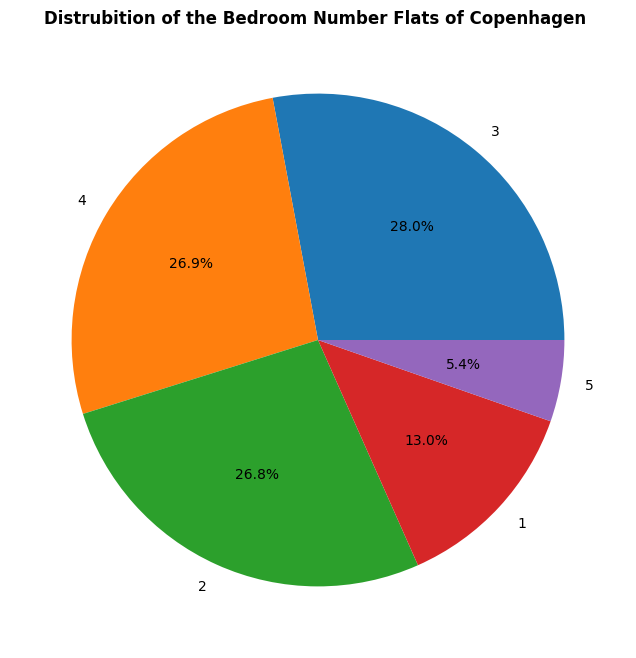

In [39]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Bedroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Copenhagen ',weight="bold")

# display the chart
plt.show();


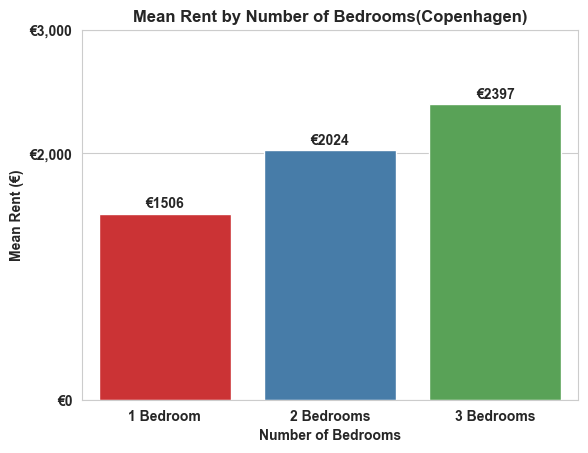

In [42]:
### Calculate mean rent for each group + add expenses ###
one_bed_mean_rent = df[df['Bedroom'] == 1]['Rent'].mean()*0.14+200
two_bed_mean_rent = df[df['Bedroom'] == 2]['Rent'].mean()*0.14+200
three_bed_mean_rent = df[df['Bedroom'] == 3]['Rent'].mean()*0.14+200

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Copenhagen)', weight='bold')

plt.show();